In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import category_encoders as ce
from google.colab import drive

# Preparation

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/dataset/kidney_disease.csv')
df = data.copy()
df

MessageError: ignored

In [ ]:
data.columns

In [ ]:
df.isna().sum() / df.shape[0]*100

In [ ]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


#preprocessing

In [ ]:
df = df.drop(['rc', 'rbc', 'id'],axis=1)

In [ ]:
# df.shape

In [ ]:
df.isna().sum() /df.shape[0] *100

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [ ]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,15.4,44,7800,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,...,11.3,38,6000,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,9.6,31,7500,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,11.2,32,6700,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,11.6,35,7300,no,no,no,good,no,no,ckd


In [ ]:
# olah = df.iloc[:, 1:22]

In [ ]:
# missing data
for i in df.columns:
  if df[i].dtype == object:
    df[i].fillna(df[i].mode()[0], inplace=True)
  else:
    df[i].fillna(df[i].mean(), inplace=True)

In [ ]:
df.isna().sum() / df.shape[0] * 100

age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [ ]:
encoder = ce.OrdinalEncoder(df)

In [ ]:
df1 = df
df1 = encoder.fit_transform(df1)

In [ ]:
df1.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,1,121.000000,36.0,...,15.4,1,1,1,1,1,1,1,1,1
1,7.0,50.0,1.020,4.0,0.0,1,1,1,148.036517,18.0,...,11.3,2,2,2,2,1,1,1,1,1
2,62.0,80.0,1.010,2.0,3.0,1,1,1,423.000000,53.0,...,9.6,3,3,2,1,1,2,1,2,1
3,48.0,70.0,1.005,4.0,0.0,2,2,1,117.000000,56.0,...,11.2,4,4,1,2,1,2,2,2,1
4,51.0,80.0,1.010,2.0,0.0,1,1,1,106.000000,26.0,...,11.6,5,5,2,2,1,1,1,1,1


In [ ]:
olah = df1.iloc[:, df.columns != 'age']

# IQR

In [ ]:
for x in olah.columns:
  # setup iqr
  q1 = df1[x].quantile(0.25)
  q3 = df1[x].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - (iqr * 1.5)
  upper_limit = q1 + (iqr * 1.5)
  # replace outliers
  df1.loc[df1[x] < lower_limit, x] = lower_limit
  df1.loc[df1[x] > upper_limit, x] = upper_limit

In [ ]:
olah['age']=df1['age']

In [ ]:
olah

,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,...,pcv,wc,htn,dm,cad,appet,pe,ane,classification,age
0,80.0,1.020,1.0,0.0,1,1,1,121.000000,36.0,1.2,...,1,1,1,1,1,1,1,1,1,48.0
1,50.0,1.020,4.0,0.0,1,1,1,148.036517,18.0,0.8,...,2,2,2,2,1,1,1,1,1,7.0
2,80.0,1.010,2.0,3.0,1,1,1,423.000000,53.0,1.8,...,3,3,2,1,1,2,1,2,1,62.0
3,70.0,1.005,4.0,0.0,2,2,1,117.000000,56.0,3.8,...,4,4,1,2,1,2,2,2,1,48.0
4,80.0,1.010,2.0,0.0,1,1,1,106.000000,26.0,1.4,...,5,5,2,2,1,1,1,1,1,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1,1,1,140.000000,49.0,0.5,...,38,4,2,2,1,1,1,1,3,55.0
396,70.0,1.025,0.0,0.0,1,1,1,75.000000,31.0,1.2,...,44,1,2,2,1,1,1,1,3,42.0
397,80.0,1.020,0.0,0.0,1,1,1,100.000000,26.0,0.6,...,40,92,2,2,1,1,1,1,3,12.0
398,60.0,1.025,0.0,0.0,1,1,1,114.000000,50.0,1.0,...,43,30,2,2,1,1,1,1,3,17.0


# KNN

In [ ]:
X = df1.iloc[:, df1.columns != 'classification']
y = df1.iloc[:, df1.columns == 'classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn import metrics
# model = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
# model.fit(X_train, y_train)
# print('Train Accuracy',model.score(X_train, y_train))

knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)
yhat= knn.predict(X_test)
print(metrics.accuracy_score(y_test, yhat))

0.925


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# y_test = np.array(y_test).reset_index()
yhat

array([3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1])

In [ ]:
yhat = pd.DataFrame(yhat)
y_test = y_test.reset_index()
del y_test['index']

In [ ]:
#test
confussion = pd.concat([y_test, yhat], axis=1)
confussion.columns = ['real', 'pred']
confussion.astype(str)

,real,pred
0,3,3
1,1,1
2,1,1
3,1,1
4,3,1
...,...,...
75,1,1
76,1,1
77,3,3
78,1,1


In [ ]:
confussion.pivot_table(index='real', columns='pred', aggfunc=np.count_nonzero)

pred,1,3
real,,
1,96,4
3,8,52


In [ ]:
# confussion = confussion.reset_index()
# del confussion['index']
confussion
confussion['pred'].unique()

array([3, 1])

In [ ]:
# y_test['classification'].unique()
np.unique(y_test['classification'], return_counts=True )

(array([1, 3]), array([50, 30]))

In [ ]:
a = confussion.pivot_table(index="real", columns='pred', aggfunc=np.count_nonzero)/2
a

pred,1,3
real,,
1,48.0,2.0
3,4.0,26.0


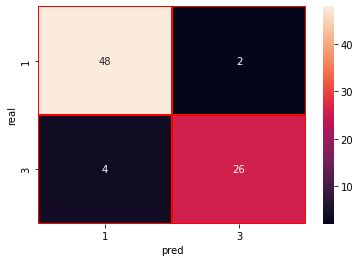

In [ ]:
sns.heatmap(data=a, annot=True, linecolor='red', linewidth=0.5)

# Confussion manual

In [ ]:
confussion = pd.concat([y_test, yhat], axis=1)
confussion.columns = ['real', 'pred']

In [ ]:
confussion['pred'].unique()

array([3, 1])

In [ ]:
confussion

,real,pred
0,3,3
1,1,1
2,1,1
3,1,1
4,3,1
...,...,...
75,1,1
76,1,1
77,3,3
78,1,1


In [ ]:
a = confussion.pivot_table(index="real", columns='pred', aggfunc=np.count_nonzero)/2
a[2] = a[1]
a[2] = 0
cols = a.columns.tolist()
cols = [1, 2, 3]
a = a[cols]
a = a.fillna(0)
a
# a.sum().sum()

pred,1,2,3
real,,,
1,48.0,0,2.0
3,4.0,0,26.0


In [ ]:
# for i in range(3):
#   print(i, i, i)

In [ ]:
b = 0
for i in range(3):
  b = b + a.iloc[i, i]
b/(a.sum().sum())

IndexError: ignored

# convusion

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=knn.predict(X_test)
y_true=y_test

cm=confusion_matrix(y_true,y_pred)
cm

array([[48,  2],
       [ 4, 26]])

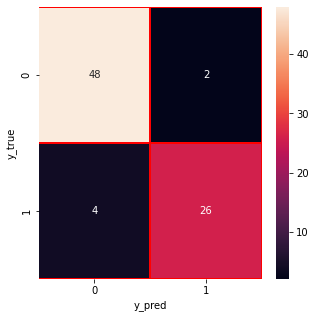

In [ ]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

test

In [ ]:
from sklearn import metrics
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

# Tuning

In [ ]:
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : [30, 32, 34, 36],
                'p' : [2, 4, 6, 8],
                'metric' : ['minkowski', 'eucledian', 'manhattan', 'chebyshev', 'wminkowski']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X_train, y_train)

In [ ]:
print("train score - " + str(grid.score(X_train, y_train)))
print("test score - " + str(grid.score(X_test, y_test)))

CVM

In [ ]:
y_pred = grid.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
sns.heatmap(data=cm, annot=True, linecolor='red', linewidth=0.5)

In [ ]:
ss

## MANUAL

# split

In [ ]:
k1 = df1[df1['classification']==1]
k2 = df1[df1['classification']==2]
k3 = df1[df1['classification']==3]

In [ ]:
print('total data :',k1.shape)
print('total data :',k2.shape)
print('total data :',k3.shape)

klasifiaksi 1


In [ ]:
train_1=k1.sample(frac=0.8,random_state=200)
test_1=k1.drop(train_1.index)

In [ ]:
X_train1 = train_1.iloc[:, train_1.columns != 'classification']
y_train1 = train_1.iloc[:, train_1.columns == 'classification']

X_test1 = test_1.iloc[:, test_1.columns != 'classification']
y_test1 = test_1.iloc[:, test_1.columns == 'classification']

klasifiaksi 2

In [ ]:
train_2=k2.sample(frac=0.5,random_state=200)
test_2=k2.drop(train_2.index)

In [ ]:
X_train2 = train_1.iloc[:, train_2.columns != 'classification']
y_train2 = train_1.iloc[:, train_2.columns == 'classification']

X_test2 = test_2.iloc[:, test_2.columns != 'classification']
y_test2 = test_2.iloc[:, test_2.columns == 'classification']

klasifikasi 3

In [ ]:
train_3=k3.sample(frac=0.8,random_state=200)
test_3=k3.drop(train_3.index)

In [ ]:
X_train3 = train_3.iloc[:, train_3.columns != 'classification']
y_train3 = train_3.iloc[:, train_3.columns == 'classification']

X_test3 = test_3.iloc[:, test_3.columns != 'classification']
y_test3 = test_3.iloc[:, test_3.columns == 'classification']

In [ ]:
X_train = pd.concat([X_train1, X_train2, X_train3]).values.tolist()
X_test = pd.concat([X_test1, X_test2, X_test3]).values.tolist()

y_train = pd.concat([y_train1, y_train2, y_train3]).values.tolist()
y_test = pd.concat([y_test1, y_test2, y_test3]).values.tolist()

In [ ]:
# np.unique(y_test['classification'], return_counts=True)

In [ ]:
# np.unique(y_train['classification'], return_counts=True)
# df1.values.tolist()
# df1 = [item for sublist in df1 for item in sublist]

In [ ]:
X = df1.iloc[:, df1.columns !='classification']
y = df1.iloc[:, df1.columns =='classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# print(X_train)
# print(type(X_train))

# Model

In [ ]:
def jarak(a, b, p = 2):
    # store dimension number
    dim = len(a)
    # set initial distance to 0
    distance = 0
    # calulate distance
    for i in range(dim):
        distance += abs(a[i] - b[i])**p

    distance = distance**(1/p)
    return distance

# test
jarak(a = X.iloc[0], b = X.iloc[1], p = 2)

In [ ]:
# define arbitary test point
test_pt = [4.8, 2.7, 2.5, 0.7]
# calculate distance between test pt & all points in X
distances = []
for i in X.index:
    distances.append(jarak(test_pt, X.iloc[i]))
df_dists = pd.DataFrame(data = distances, index = X.index, columns = ['dist'])
df_dists

In [ ]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    # make predictions on test data
    # need output of 1 prediction per test data point
    y_hat_test = []
    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = jarak(test_point, train_point, p = p)
            distances.append(distance)

        # store distances in dataframe
        df_dists = pd.DataFrame(data = distances, columns = ['dist'], index = y_train.index)
        # store distances and only consider the k closest points
        df_nn = df_dists.sort_values(by = ['dist'], axis = 0)[:k]
        # create counter object to track the labels of k closest points
        counter = Counter(y_train[df_nn.index])
        # get most common label of all nearest neighbors
        prediction = counter.most_common()[0][0]
        # append prediction to output list
        y_hat_test.append(prediction)

    return y_hat_test

# make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k = 5, p = 2)
print(y_hat_test)

In [ ]:
max()